# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and aa
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
churn = pd.read_csv('churn.csv')

### Understanding the data

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


So, there are **no null values** and tenure, seniorcitizen are **integer type**, monthly charges are **float type**, rest are strings. **Total charges** should also be **float type**. Lets check it.

### Data Manipulation

In [7]:
churn['TotalCharges'].sample(10)

4941      58.15
5486     4735.2
2158     4845.4
5541     6428.4
6593     2978.3
2168      527.9
2864      226.2
4339    2669.45
1655      134.5
3504     1377.7
Name: TotalCharges, dtype: object

In [8]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn['TotalCharges'].sample(10)

6353     568.85
3370    2495.20
6361     418.30
4824    7133.10
5758     475.10
297     3437.50
1003     784.25
6515     712.85
2580    2974.50
1058     185.55
Name: TotalCharges, dtype: float64

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

Now **TotalCharges** has got some **null** values.

In [10]:
churn.loc[churn['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It has got null totalcharges for those who were having **tenure, 0 months**. We will fill them with 0.

In [11]:
churn.loc[churn['TotalCharges'].isnull()==True] = 0

Let's work on **categorical data**.

In [12]:
print('gender:',churn.gender.unique())
print('SeniorCitizen:',churn.SeniorCitizen.unique())
print('Partner:',churn.Partner.unique())
print('Dependents:',churn.Dependents.unique())
print('PhoneService:',churn.PhoneService.unique())
print('MultipleLines:',churn.MultipleLines.unique())
print('InternetService:',churn.InternetService.unique())
print('OnlineSecurity:',churn.OnlineSecurity.unique())
print('OnlineBackup:',churn.OnlineBackup.unique())
print('DeviceProtection:',churn.DeviceProtection.unique())
print('TechSupport:',churn.TechSupport.unique())
print('StreamingTV:',churn.StreamingTV.unique())
print('StreamingMovies:',churn.StreamingMovies.unique())
print('Contract:',churn.Contract.unique())
print('PaperlessBilling:',churn.PaperlessBilling.unique())
print('PaymentMethod:',churn.PaymentMethod.unique())
print('Churn:',churn.Churn.unique())

gender: ['Female' 'Male' 0]
SeniorCitizen: [0 1]
Partner: ['Yes' 'No' 0]
Dependents: ['No' 'Yes' 0]
PhoneService: ['No' 'Yes' 0]
MultipleLines: ['No phone service' 'No' 'Yes' 0]
InternetService: ['DSL' 'Fiber optic' 'No' 0]
OnlineSecurity: ['No' 'Yes' 'No internet service' 0]
OnlineBackup: ['Yes' 'No' 'No internet service' 0]
DeviceProtection: ['No' 'Yes' 'No internet service' 0]
TechSupport: ['No' 'Yes' 'No internet service' 0]
StreamingTV: ['No' 'Yes' 'No internet service' 0]
StreamingMovies: ['No' 'Yes' 'No internet service' 0]
Contract: ['Month-to-month' 'One year' 'Two year' 0]
PaperlessBilling: ['Yes' 'No' 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' 0]
Churn: ['No' 'Yes' 0]


So, **SeniorCitizen** is already in required form, while others are not, so will have to change them to numeric values.

In [13]:
churn.gender.replace(['Male','Female'],[0,1],inplace=True)
churn.Partner.replace(['Yes','No'],[1,0],inplace=True)
churn.Dependents.replace(['Yes','No'],[1,0],inplace=True)
churn.PhoneService.replace(['Yes','No'],[1,0],inplace=True)
churn.MultipleLines.replace(['No phone service','No','Yes'],[0,0,1],inplace=True)
churn.InternetService.replace(['Fiber optic','DSL','No'],[2,1,0],inplace=True)
churn.OnlineSecurity.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.OnlineBackup.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.DeviceProtection.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.TechSupport.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.StreamingTV.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.StreamingMovies.replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
churn.Contract.replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
churn.PaperlessBilling.replace(['Yes','No'],[1,0],inplace=True)
churn.PaymentMethod.replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
churn.Churn.replace(['Yes','No'],[1,0],inplace=True)

In [14]:
churn.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6270,0625-AFOHS,1,0,1,1,29,1,0,0,0,...,0,0,0,0,2,0,1,20.20,558.80,0
3222,6817-WTYHE,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,0,2,44.90,111.05,0
5295,2144-BFDSO,1,1,1,0,50,1,1,2,1,...,1,0,1,1,0,0,2,108.75,5431.90,0
495,8205-OTCHB,0,0,0,0,22,0,0,1,0,...,1,0,0,1,1,1,2,43.75,903.60,1
207,1285-OKIPP,0,0,0,0,1,1,0,2,0,...,0,0,0,1,0,0,0,79.90,79.90,1


**customerID** doesn't seem important here.

In [15]:
churn.drop(['customerID'],axis=1,inplace=True)

In [16]:
churn.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5327,1,0,1,1,30,1,0,0,0,0,0,0,0,0,2,0,1,19.7,599.25,0
3639,1,1,1,0,60,1,1,2,0,0,1,0,1,1,1,1,3,100.5,6029.00,0
5792,1,1,0,0,15,1,0,2,1,0,1,1,0,1,0,1,1,96.3,1426.75,1
6044,1,0,0,1,12,1,1,2,0,0,0,0,0,0,0,1,0,76.6,893.00,0
1754,0,0,0,0,62,1,0,1,1,1,0,0,1,1,1,1,3,74.3,4698.05,0


### Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

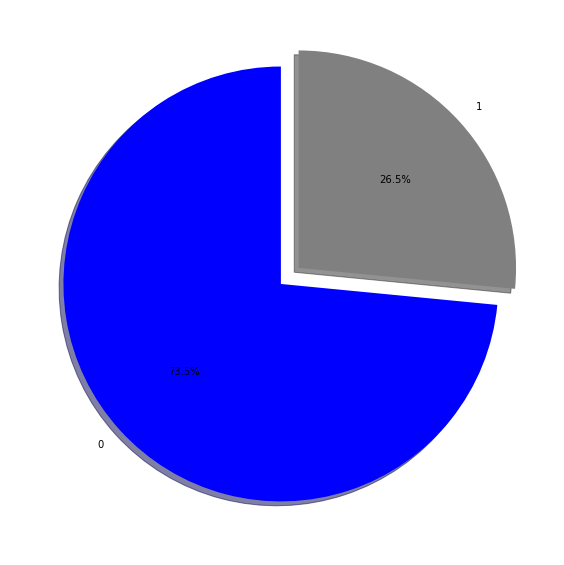

In [18]:
churn_size = churn['Churn'].value_counts(sort = True)
colors = ['Blue','Grey']
plt.figure(figsize=(10,10))
plt.pie(churn_size, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,explode=[0.01,0.1],labels=[0,1])
plt.show()

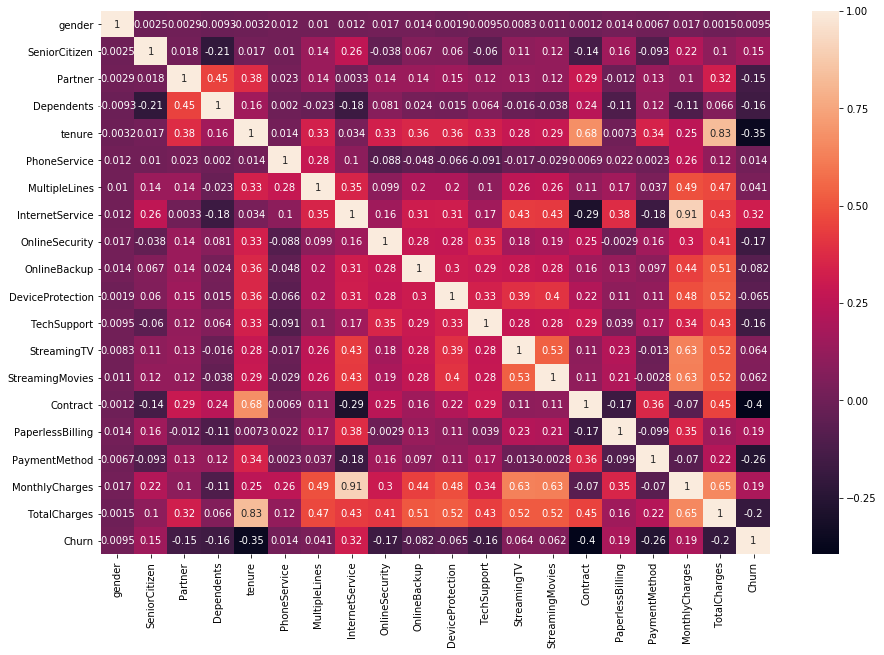

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(churn.corr(),annot=True)

In the **non-categorical variables**(tenure, monthlycharges, totalcharges), it seems that **totalcharges** is **highly correlated** with **monthlycharges** and **tenure**, so will proceed after dropping it.

In [20]:
churn.drop(['TotalCharges'],axis=1,inplace=True)

In [21]:
calibration_size = 4000/len(churn)
validation_size = 3043/len(churn)

### Implement Machine Learning Models

In [22]:
from sklearn.model_selection import train_test_split
cal,val = train_test_split(churn,test_size=validation_size)

In [23]:
len(cal)

4000

In [24]:
cal_y = cal['Churn']
val_y = val['Churn']
 
cal_x = cal
cal_x.drop(['Churn'],axis=1,inplace=True)
val_x = val
val_x.drop(['Churn'],axis=1,inplace=True)

In [25]:
print(cal_x.shape)
print(cal_y.shape)
print(val_x.shape)
print(val_y.shape)

(4000, 18)
(4000,)
(3043, 18)
(3043,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
logR = LogisticRegression()
logR.fit(X = cal_x, y = cal_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
pred_logR = logR.predict(val_x)

### Model Evaluation

In [29]:
logR.coef_.ravel()

array([ 0.09541367,  0.33647435,  0.0604707 , -0.14645178, -0.03404614,
       -0.58418773,  0.18912953,  0.60170401, -0.32748123, -0.16605216,
       -0.09315323, -0.34120079,  0.05129515,  0.18457141, -0.60135791,
        0.29992147, -0.15715528,  0.01048764])

In [30]:
from sklearn.feature_selection import RFE
cal_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [31]:
logR_bestfeatures = RFE(logR,5)
temp = logR_bestfeatures.fit(cal_x,cal_y)
print(temp.support_)
print(temp.ranking_)

[False False False False False  True False  True  True False False  True
 False False  True False False False]
[ 9  5  6 10 13  1 11  1  1  2  8  1 12  7  1  3  4 14]


In [32]:
cal_x.columns[temp.support_]

Index(['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'Contract'],
      dtype='object')

In [33]:
sum(pred_logR == val_y)/len(val_y)

0.8156424581005587

In [34]:
sum(pred_logR == val_y)

2482

In [35]:
print(classification_report(val_y,pred_logR))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2232
           1       0.68      0.57      0.62       811

   micro avg       0.82      0.82      0.82      3043
   macro avg       0.77      0.74      0.75      3043
weighted avg       0.81      0.82      0.81      3043



In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()
svc.fit(X = cal_x, y = cal_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
pred_svc = svc.predict(val_x)

### Model Evaluation

In [39]:
sum(pred_svc == val_y)/len(val_y)

0.7992113046335853

In [40]:
print(classification_report(val_y,pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2232
           1       0.67      0.48      0.56       811

   micro avg       0.80      0.80      0.80      3043
   macro avg       0.75      0.70      0.72      3043
weighted avg       0.79      0.80      0.79      3043



In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(X = cal_x, y = cal_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
pred_dtc = dtc.predict(val_x)

### Model Evaluation

In [44]:
dtc_bestfeatures = RFE(dtc,5)
temp = dtc_bestfeatures.fit(cal_x,cal_y)
print(temp.support_)
print(temp.ranking_)

[False False False False  True False False  True False False False False
 False False  True False  True  True]
[ 2 10  3  5  1 14  9  1  4  6 12  8 13 11  1  7  1  1]


In [45]:
cal_x.columns[temp.support_]

Index(['tenure', 'InternetService', 'Contract', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [46]:
sum(pred_dtc == val_y)/len(val_y)

0.7236279986855078

In [47]:
print(classification_report(val_y,pred_dtc))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2232
           1       0.48      0.55      0.52       811

   micro avg       0.72      0.72      0.72      3043
   macro avg       0.66      0.67      0.66      3043
weighted avg       0.74      0.72      0.73      3043



### Final Conclusions

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable. A good example is “Internet Service”: The positive relation to churn means that having it also increases the probability of a customer to churn. On the other hand that some of variables like(tenure,tech support etc) negative relation to the predicted variable, which means that customers with these features are very unlikely to churn. But we can also see that some variables do not make sense in the first point. Here it is important to dig deeper and get some context for the data.